In [1]:
# Import the random module.
import random

# Import the numpy module.
import numpy as np

# Import the matplotlib.pyplot module.
import matplotlib.pyplot as plt

In [2]:
time_interval = 1000  # Specifies the total number of cycles or time interval

In [3]:
def generate_signal(rate, num_cycle):
    # rate = np.random.randint(low=1,high=21)
    signals = np.array([])  # Initialize an empty numpy array to store the signals

    for i in range(0, num_cycle, rate):  # Iterate over the cycles with the given rate
        curr_bit = np.random.randint(low=0, high=2)  # Generate a random bit (0 or 1)

        if i + rate > num_cycle:
            repeat_time = num_cycle - i  # Calculate the remaining cycles if less than the given rate
        else:
            repeat_time = rate  # Use the given rate if enough cycles are remaining

        for _ in range(repeat_time):  # Repeat the current bit for the calculated number of cycles
            signals = np.append(signals, curr_bit)  # Append the current bit to the signals array

    return signals  # Return the generated signals

In [4]:
def append_dispatcher(filtered_bit, value):
    """
    Function to append a value to the filtered_bit array.

    Args:
    filtered_bit (numpy.array): The array to which the value should be appended.
    value: The value to append to the array.

    Returns:
    numpy.array: The updated array after appending the value.
    """
    return np.append(filtered_bit, value)

In [5]:
def filter_jammer_bits(result_bits):
    filtered_bit = np.array([])  # Initialize an empty array to store the filtered bits

    for i in range(len(result_bits)):
        if result_bits[i] == 2:  # If the result bit is 2 (jammer signal)
            filtered_bit = append_dispatcher(filtered_bit, 1)  # Append 1 to the filtered bits array
        elif result_bits[i] == 0:  # If the result bit is 0 (non-jammer signal)
            filtered_bit = append_dispatcher(filtered_bit, 0)  # Append 0 to the filtered bits array
        elif result_bits[i] == 1:  # If the result bit is 1
            if result_bits[i-1] == 2:  # If the previous result bit is 2 (jammer signal)
                filtered_bit = append_dispatcher(filtered_bit, 0)  # Append 0 to the filtered bits array
            elif result_bits[i-1] == 0:  # If the previous result bit is 0 (non-jammer signal)
                filtered_bit = append_dispatcher(filtered_bit, 1)  # Append 1 to the filtered bits array
            else:  # If the previous result bit is 1
                filtered_bit = append_dispatcher(filtered_bit, np.random.randint(low=0, high=2))  # Append random 0 or 1 to the filtered bits array

    return filtered_bit  # Return the filtered bits array

In [6]:
def draw_summary(jammer_signal, sender_signal, mixed_signal, processed_signal, time_interval):
    # Create a figure with subplots
    fig, axs = plt.subplots(3, figsize=(20, 6))
    fig.suptitle(f'{time_interval} Cycles - Result')

    # Create x-axis values
    t = np.linspace(start=0, stop=time_interval, num=time_interval, dtype=int)

    # Plot the mixed signals
    axs[0].title.set_text("Mixed signals")
    axs[0].plot(t, mixed_signal, label="mixed")
    axs[0].plot(t, jammer_signal, label="jammer")
    axs[0].plot(t, sender_signal, label="sender")

    # Plot the jammer signal vs sender signal
    axs[1].title.set_text("Jammer vs Sender")
    axs[1].plot(t, jammer_signal, label="jammer")
    axs[1].plot(t, sender_signal, label="sender")

    # Plot the sender signal vs approximation
    axs[2].title.set_text("Sender vs Approximation")
    overlapping = 0.30
    axs[2].plot(t, sender_signal, label="sender", c='red', alpha=overlapping, lw=5)
    axs[2].plot(t, processed_signal, label="inference", c='green', alpha=overlapping)

    # Add legends to the subplots
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Display the plot
    plt.show()


In [7]:
def numerical_summary(jammer_signal, sender_signal, mixed_signal, processed_signal, time_interval):
    """
    Print a numerical summary of the signals.

    Parameters:
    - jammer_signal: The jammer signal array.
    - sender_signal: The sender signal array.
    - mixed_signal: The mixed signal array.
    - processed_signal: The processed signal array.
    - time_interval: The number of cycles.
    - jamming_rate: The jamming rate.
    - send_rate: The send rate.
    """

    # Calculate accuracy by comparing sender_signal and processed_signal
    accuracy = np.sum(np.equal(sender_signal, processed_signal)) * 100 / time_interval

    # Print the numerical summary
    print(f"Accuracy: {accuracy}%")

In [8]:
# def bulk_test(test_list, jammer_rate, sender_rate, draw=False):
#     """
#     Perform a bulk test by iterating over different time intervals and jamming rates.

#     Parameters:
#     - test_list: a list of time intervals to test
#     - jammer_rates: a list of jamming rates to test
#     - draw: a boolean value indicating whether to draw graphs

#     """
#     for time_interval in test_list:
#         for jamming_rate in jammer_rate:
#             # Generate jammer and sender signals
#             jammer_signal = generate_signal(jamming_rate, time_interval)
#             sender_signal = generate_signal(sender_rate, time_interval)

#             # Combine jammer and sender signals
#             received_signals = jammer_signal + sender_signal

#             # Process the received signals
#             processed_signals = filter_jammer_bits(received_signals)

#             # Compute and print numerical summary
#             numerical_summary(jammer_signal, sender_signal, received_signals,
#                               processed_signals, time_interval, jamming_rate, sender_rate)

#             # Draw graphs if draw is True
#             if draw:
#                 draw_summary(jammer_signal, sender_signal,
#                              received_signals, processed_signals, time_interval)

In [961]:
def bulk_test(test_list, jammer_rate, sender_rate, draw=False):
    """
    Perform a bulk test by iterating over different time intervals and jamming rates.

    Parameters:
    - test_list: a list of time intervals to test
    - jammer_rates: a list of jamming rates to test
    - draw: a boolean value indicating whether to draw graphs

    """
    accuracy_row = []
    for time_interval in test_list:
        for jamming_rate in jammer_rate:
            # Generate jammer and sender signals
            jammer_signal = generate_signal(jamming_rate, time_interval)
            sender_signal = generate_signal(sender_rate, time_interval)

            # Combine jammer and sender signals
            received_signals = jammer_signal + sender_signal

            # Process the received signals
            processed_signals = filter_jammer_bits(received_signals)

            accuracy = np.sum(np.equal(sender_signal, processed_signals)) * 100 / time_interval
            accuracy_row.append(accuracy)

            # Draw graphs if draw is True
            if draw:
                draw_summary(jammer_signal, sender_signal,
                             received_signals, processed_signals, time_interval)
    return accuracy_row

In [943]:
generate_signal(100, 100)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [946]:
# Generate jammer signals using the specified jamming rate and time interval
jammer_signal = generate_signal(10, time_interval)

# Generate sender signals using the specified sender rate and time interval
sender_signal = generate_signal(1, time_interval)

# Calculate the result signals by summing the sender signals and jammer signals
mixed_signal = sender_signal + jammer_signal

# Filter out the jammer signals and obtain the filtered sender signals
processed_signal = filter_jammer_bits(mixed_signal)

numerical_summary(jammer_signal, sender_signal, mixed_signal, processed_signal, time_interval)

Accuracy: 87.8%


In [12]:
numerical_summary(jammer_signal, sender_signal, mixed_signal, processed_signal, time_interval)

Accuracy: 88.5%


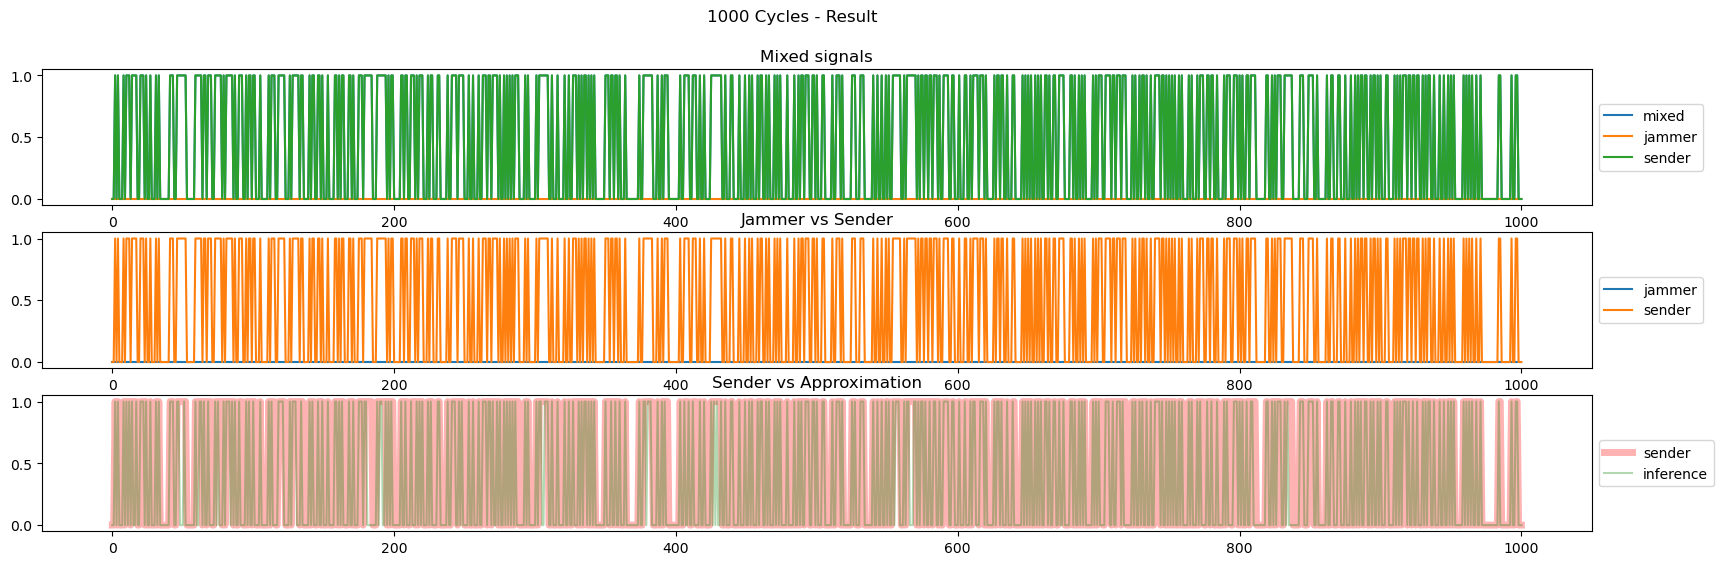

In [13]:
draw_summary(jammer_signal, sender_signal, mixed_signal, processed_signal, time_interval)

In [1007]:
def draw_accvsdiff(time_interval, difference, accuracy):
    # Create a figure with subplots
    fig, axs = plt.subplots(1, figsize=(20, 6))
    fig.suptitle(f'{time_interval} Cycles - Result')

    # Create x-axis values
    t = np.linspace(start=1, stop=difference, num=difference, dtype=int)

    # Plot the mixed signals
    axs.set_title("Mixed signals")
    axs.plot(t, difference, label="mixed")
    axs.plot(t, accuracy, label="accuracy")
    axs.plot(t, sender_signal, label="sender")

    # Add legends to the subplots
    axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Display the plot
    plt.show()


[74.8, 82.9, 84.0, 84.8, 84.0, 84.4, 83.2, 86.3, 86.4, 86.4]


TypeError: 'list' object cannot be interpreted as an integer

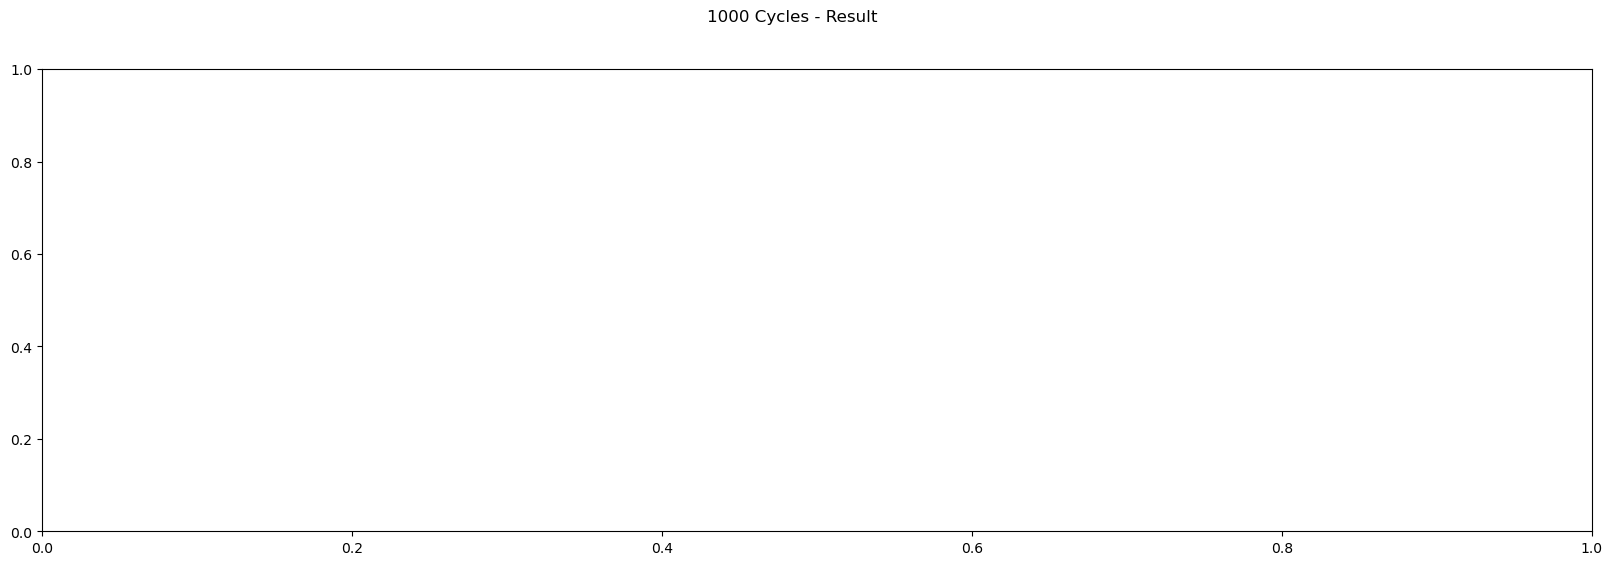

In [1008]:
# accuracy = bulk_test([10 ** 3], list(range(2,102)), 1)
accuracy = bulk_test([10 ** 3], [1, 2, 3, 4, 5, 6, 7, 8, 9, 100], 1)
print(accuracy)
# accuracy

draw_accvsdiff(time_interval, [1, 2, 3, 4, 5, 6, 7, 8, 9, 100], accuracy)